## Examen
### Extractor d'ozó

[<center><img src=./static/FaXToR2.png width=50%></center>](#img_FaXToR)

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
from IPython.display import Math, display
import sympy as sp
from sympy.physics.units.systems import SI
from sympy.physics.units import meter, second, liter, hour, degree, convert_to
from sympy import sin, cos, pi, Abs

sp.init_printing()

def show(*args):
    out = ""
    for arg in args:
        if isinstance(arg, (sp.Expr, sp.Eq)):
            arg = sp.latex(arg)
        else:
            arg = str(arg)
        out += arg
    display(Math(out))
    
qq = "\quad "

## Extractor d'ozó
- En un sincrotró tenim una cabina experimental plomada on es fan experiments amb raigs-X
- Aquesta radiació genera ozó a partir de l'oxigen a un ritme d'una molècula d'ozó per cada $(3.7 \pm 0.1) \times 10^9$ molècules d'oxigen per segon.
- L'ozó és tòxic a concentracions de 5 ppm i el seu nivell de seguretat és de 0.1 ppm
- Per mantenir l'ozó a un nivell segur, s'instal·la un extractor d'aire i necessitem saber quin cabal és necessari per garantir una concentració d'ozó per sota de 0.1 ppm amb un CL del $99.98 \%$
- La concentració d'oxigen a l'aire és de $20.9476 \pm 0.0005 \%$
- La cabina experimental té un volumen de $125.4 \pm 0.8 \, m^3$

### Dades
- Per validar el model hem fet unes proves irradiant un volum d'aire amb un extractor.
    - Volum d'aire $1.0000 \pm 1\times10^{-4} m^3$
    - Cabal d'aire de l'extractor $1.0 \pm 0.1 \,l/s$
    - La precisió de les mesures és de $1\times10^{-3}$ ppm

Index(['t (s)', 'Concentració (ppm)'], dtype='object')


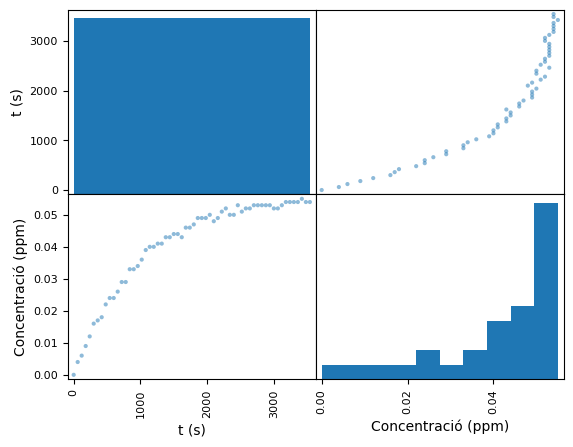

In [2]:
# Dades
data = pd.read_csv("./data/ozo.csv")
print(data.columns)
l = pd.plotting.scatter_matrix(data[data.columns])

### Coneixements previs

- La llei dels gasos ideals ens diu que:

$PV=nRT$

- on:
  - P és la pressió del gas
  - V és el volum del gas
  - n és la quantitat de molècules de gas
  - R és la constant dels gasos ideals (8.314 $J \,K^{−1}\, mol^{-1}$)
  
</br>

- En el cas de pressió i temperatura constants:

$$
\begin{align}
\frac{n}{V} & = cte \\
\frac{n_1}{V_1} & = \frac{n_2}{V_2} \\
\frac{n_1}{n_{2}} & = \frac{V_1}{V_{2}} \\
\frac{n_i}{n_{Total}} & = \frac{V_i}{V_{Total}} \\
\end{align}
$$
  

## Apartats
- Descriu i analitza el sistema rellevant per a l'estudi (5 punts)
- Fes les assumpcions pertinents i argumenta-les adequadament (5 punts)
- Modelitza i resol el model (10 punts)
- Verifica i valida el model (10 punts)
- Fes una anàlisi crítica dels resultats (5 punts)

## Anàlisi del sistema

### Context

Una empresa química sol·licita l'investigació sobre un extractor d'aire per a mantenir un nivell segur d'ozo en l'ambient de treball de la seva factoria. $\newline$
OBJECTIU: Determinar el cabal necesari que ha de tenir l'extractor d'aire per a que la concentració de la mol·lecula d'ozo en l'aire sigui segura per a la salud

### Paràmetres

Definim el paràmetres (i les seves unitats) que s'utilitzaràn per a l'estudi:
- Número de mol·lecules: N [#mol·lecules]
- Volum d'aire: V [m^3]
- Temps: t [s]
- Cabal d'aire: q = V / t [m^3 / s]
- Concentració de mol·lecules: C = N / V [#mol·lecules / m^3]
- Mol·lecules d'oxigen: Ox [#mol·lecules]
- Mol·lecules d'ozo: Oz [#mol·lecules]
- Taxa de generació d'ozo: T [#mol·lecules oxigen / s]

### Paràmetres de l'assaig

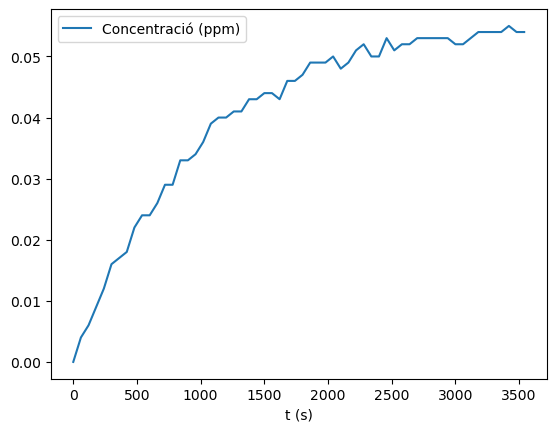

In [3]:
# Visualització de dades
l = data.plot(x="t (s)", y="Concentració (ppm)")

## Assumpcions

Per tal d'obtenir uns primers resultats de forma inicial podem assumir que:
- El nivell d'oxigen a la cabina és constant (la cabina és plomada pero no sellada)
- La generació d'ozo és constant i no és dete mai (sempre hi ha oxigen disponible)
- La cabina pot assumir tot l'ozo que és generi sense desplaçar així les mol·lecules d'oxigen (sempre hi ha oxigen a la cabina amb la mateixa quantitat)
- La pressió i temperatura de la cabina és constant
- No hi han problemes de frabicació de l'extractor o del plomatge de la cabina
- No hi han sortides d'aire a part de l'extractor d'aire a testejar
- No hi han altres elements o mol·lecules en l'aire que puguin afectar al funcionament
- Les mol·lecules generades (ozo) no és fucionen amb altres elements
- Hi ha moltes menys mol·lecules d'ozo a la cabina que mol·lecules d'oxigen (sempre); per tant, la concentració d'oxigen és constant

RELACIONS:
- A més mol·lecules d'ozo major és la seva concentració (proporcional)
- A més mol·lecules d'oxigen, més mol·lecules d'ozo és generen per segon (proporcional)
- A major fluxe d'aire, menor número de mol·lecules d'ozo (inversament proporcional)
- A major número de mol·lecules d'ozo, més extracció de mol·lecules (proporcional)

## Modelització

In [4]:
from sympy.abc import V, t, r, q

Oz = sp.Function("O_z")(t)
Ox = sp.Symbol("O_x")

C = Oz / V

dOz = sp.diff(Oz)
Ozp = r*Ox - q*C # DIFERENCIA D'OZO = OZO GENERAT - OZO EXTRET (input - output)
show(Ozp)

ics = {Oz.subs(t,0): 0}
sol = sp.dsolve(sp.Eq(dOz, Ozp), ics = ics)
show(sol)

CONCENTRACIO = sol.rhs / V 
show (CONCENTRACIO)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [5]:
# Reescrivim l'equació mitjançant propietats d'exponencials i logaritmes:
CONC = (Ox*V*r -Ox*V*r* sp.exp(-q*t/V))/(V*q)
show("Concentració\ Ozo = ", CONC)
CON = (Ox*r*( 1- sp.exp(-q*t/V)) )/(q)
show("Concentració\ Ozo = ", CON)

Cox = sp.Symbol("C_{ox}")
Coz = CON.subs(Ox, Cox*V)
show("Concentració\ Ozo = ", Coz)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Observem així (mitjançant un analisi dimensional) que el nostre model és consistrent amb les unitats, ja que:
- [Cox · V · r] = #mol·lecules ozo / s
- [Cox · V · r / q ] = #mol·lecules ozo / m^3 (unitats de concentració)
- [q · t / V ] = 1 (no té unitats, és adimensional; condició per a la funció exponencial)

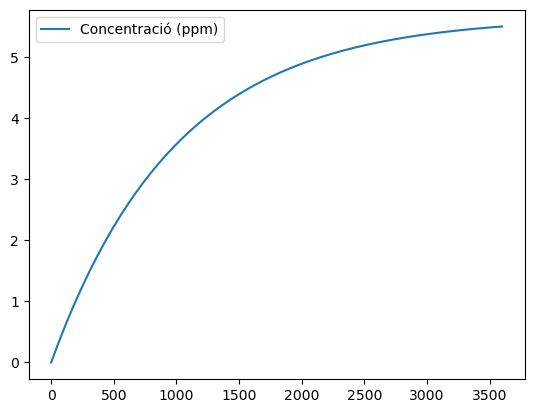

In [6]:
# Comportament del model
valors = {Cox: 20.9476*10**6, V: 1, r: 1/(3.7 * 10**9), q: 1/1000}

fXt = sp.lambdify(t, Coz.subs(valors))
temps = np.linspace(0, 3600, 60)

y = fXt(temps)
plt.plot(temps, y)
plt.legend(["Concentració (ppm)"])
plt.show()

# valors = {...} # unitats
# par = {...} # unitats

# fXt = sp.lambdify(t, Xt.subs(valors).subs(par))

# temps = np.linspace(0, 3600, 60)
# y = fXt(temps)
# plt.plot(temps, y)
# plt.legend(["y (unitats)"])
# plt.show()

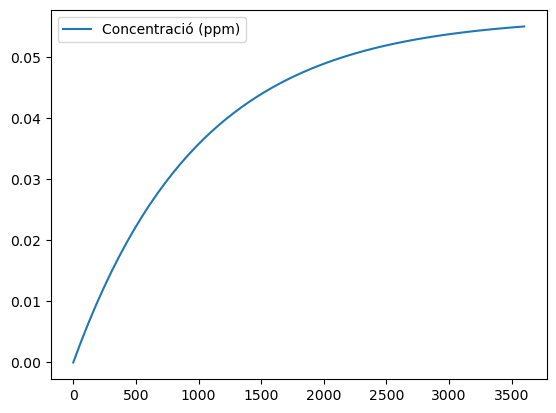

In [7]:
# Observem que l'escala no és la correcta, segurament per a un canvi erroni en el canvi d'unitats
# Per a proseguir és dividirà els resultats obtinguts per a un factor 100 per tal d'obtenir l'escala correcta
fXt = sp.lambdify(t, Coz.subs(valors)/100)
temps = np.linspace(0, 3600, 60)

y = fXt(temps)
plt.plot(temps, y)
plt.legend(["Concentració (ppm)"])
plt.show()

In [8]:
# Cercar el màxim

# S'OBSERVA COM LA CONCENTRACIÓ MÀXIMA ÉS SITUA AL L'INFINIT (AL SER UNA FUNCIÓ AMB ASSIMPTOTA HORITZONTAL),
# PODEM DONCS CALCULAR EL SEU MÀXIM VISUALMENT SABENT QUE HI SERÀ QUAN L'EXPONENCIAL DEL MODEL DONI 0;
# ÉS A DIR, Coz_Max = Cox * r * V / q
Coz_Max = Cox * r * V / q
show(Coz_Max)

# from sympy import oo
# show(sp.limit(Coz, t, oo))

<IPython.core.display.Math object>

In [9]:
# Cabal òptim per una concentració màxima donada

# Mitjançant el model trobat, aïllem el cabal:
COZ = sp.Symbol("C_{oz}")
Q = sp.solve(sp.Eq(Coz_Max, 100*COZ), q)[0] # Multipliquem COZ X 100 per tal de tenir en compte el canvi d'escala
show(Q)

<IPython.core.display.Math object>

In [10]:
# Cabal òptim per una concentració de 0.1 ppm

# Trobem el cabal óptim mitjançant l'expressió anteriorment trobada
CABAL_OPTIM = Q.subs(valors).subs(COZ, 0.1) 
show(CABAL_OPTIM)

<IPython.core.display.Math object>

Observem com, efectivament, no s'arriba a assolir mai la concentració màxima; només a l'infinit

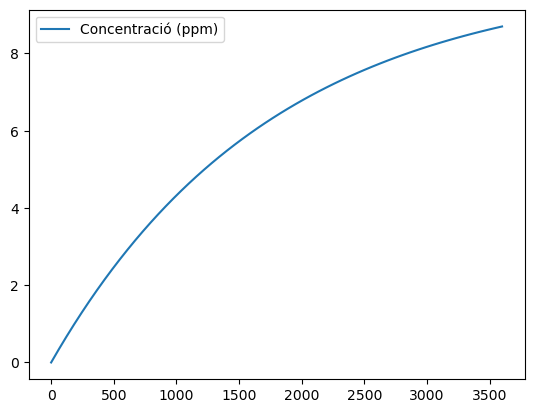

In [11]:
fXt = sp.lambdify(t, Coz.subs(q, CABAL_OPTIM).subs(valors))
temps = np.linspace(0, 3600, 60)

y = fXt(temps)
plt.plot(temps, y)
plt.legend(["Concentració (ppm)"])
plt.show()

### Coeficients de sensitivitat del model

In [12]:
show(Coz)

<IPython.core.display.Math object>

In [13]:
CCox = Cox / Coz * sp.diff(Coz, Cox)
CV = V / Coz * sp.diff(Coz, V)
Cr = r / Coz * sp.diff(Coz, r)
Cq = q / Coz * sp.diff(Coz, q)

show(CCox, qq,qq, CV, qq,qq, Cr, qq,qq, Cq)

<IPython.core.display.Math object>

In [14]:
show(CCox.subs(valors).n(4), qq,qq, CV.subs(valors).n(4), qq,qq, Cr.subs(valors).n(4), qq,qq, Cq.subs(valors).n(4))

<IPython.core.display.Math object>

## Verificació i validació

### Verificació

### Validació

In [15]:
# Simulació

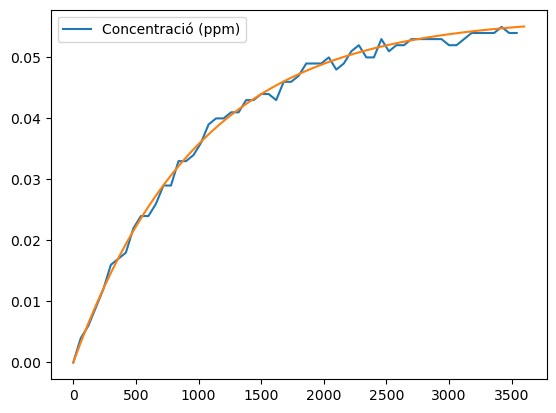

In [16]:
# Dades
plt.plot(data["t (s)"], data["Concentració (ppm)"])

fXt = sp.lambdify(t, Coz.subs(valors)/100)
temps = np.linspace(0, 3600, 60)

y = fXt(temps)
plt.plot(temps, y)
plt.legend(["Concentració (ppm)"])
plt.show()

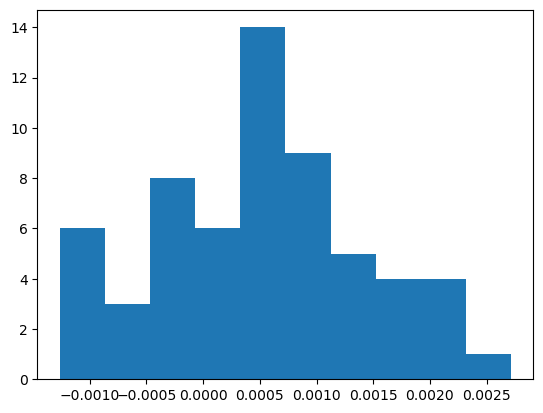

In [17]:
# DISCREPÀNCIA  :
E = y - data["Concentració (ppm)"]
h = plt.hist(E)

In [18]:
mesures = {} # No disposem de dades de mesures --> tot el conexiement és mesurat amb un marge d'error

valors = {Cox: 20.9476*10**6, V: 1, r: 1/(3.7 * 10**9), q: 1/1000}

SCox = sp.diff(Coz/100, Cox).subs(valors).n()
Sq = sp.diff(Coz/100, q).subs(valors).n()
Sr = sp.diff(Coz/100, r).subs(valors).n()
SV = sp.diff(Coz/100, V).subs(valors).n()

In [19]:
tmax = 3600 # 1 hora és un temps molt gran pel que el podem fer servir

up2 = np.sum(np.power([
    SCox * 10**(-3),
    Sq * 0.1,
    Sr* 0, # --> es tracta d'un coneixement amb tanta precisió que podem assumir no incertesa
    SV * 10**(-4)
], 2)).subs(t,tmax).subs(valors).subs(mesures)
show(up2)

<IPython.core.display.Math object>

In [20]:
# Incertesa de l'estimació de la discrepància
uV = np.sqrt(float(up2)+E.std()**2) # Les dades tenen errors de mesura
show(uV)

<IPython.core.display.Math object>

In [21]:
# Discrepància
show(" E = %0.3f \pm %0.3f \,ppm" % (E.mean(), uV))

<IPython.core.display.Math object>

In [22]:
# Interval de t per un nivell de confiança del 99.98%
ti = stats.t.interval(0.9998, tmax)[1]

show(uV*ti)

<IPython.core.display.Math object>

In [23]:
# Concentració límit per estar per sota de 0.1 ppm amb un nivell de confiança del 99.98%
0.1*ti

In [24]:
# Cabal mínim per assolir la concentració límit
show(Q.subs(valors).subs(COZ, 0.1*ti))

<IPython.core.display.Math object>

In [25]:
# Incertessa del cabal minim
valors = {Cox: 20.9476*10**6, V: 125.4, r: 1/(3.7 * 10**9), q: 1/1000, COZ: 0.1*ti}

QCox = sp.diff(Q, Cox).subs(valors).n()
QCoz = sp.diff(Q, COZ).subs(valors).n()
Qr = sp.diff(Q, r).subs(valors).n()
QV = sp.diff(Q, V).subs(valors).n()

up2 = np.sum(np.power([
    QCox * 10**(-3),
    QCoz * data["Concentració (ppm)"].std(),
    Qr* 0, # --> es tracta d'un coneixement amb tanta precisió que podem assumir no incertesa
    QV * 0.8
], 2)).subs(valors).n(2)
show(up2)

<IPython.core.display.Math object>

In [26]:
show(" q = %0.3f \pm %0.4f \,m^3/s" % (CABAL_OPTIM, np.sqrt(float(up2))))

<IPython.core.display.Math object>

## Anàlisi crítica

Observem del model proposat dos succesos importants:
- Visualment s'aproxima molt bé a les dades experimentals obtingudes
- S'ha de fer un reescalat de les dades per tal d'obtenir els valors que volem
$\newline$

Podem doncs afirmar que el model és prou bo (no només per que visualment sembla correcta sino també perque disposem d'un llindar d'error molt baix: 0.001).$\newline$

Tot i així està en factor de haber de refer l'escalat dels resultats per a obtenir valors raonables que donen lloc a fer una revisió del plantejament del model en cerca de l'error.
A més d'aquesta factor existeix el fet que la variança de l'error estimat del model és molt elevada (4ppm) pel que inclouria valors que possen la salut dels treballadors en perill; tot i també comentar com el model tendeix a sobreestimar la quantitat d'Ozo que hi ha, així com les dades tendeixen a estabilitzar-se una mica per sota, o a la bora, d'on s'estabilitza el model. $\newline$
Aquests factors fan que un replanteg de l'analisi critica o del model en si sigui necesari per tal d'obtenir millors prediccions i assegurar un bon funcinament del extractor d'aire.
$\newline$
A més, es recomana també augmentar la precissió de certes dades que, a la llarga (en grans unitats de temps), poden ser crucials degut a la relevancia que hi obtenen (com pot ser el la concentració d'oxigen a l'habitació/cabina).
$\newline$
Per aquests motius s'aconsella una revisió del model i millorar la seva precisió (sigui mitjançant millor precisió de dades o introduït paràmetres que poden ser significants com la descomposició de l'Ozo al juntar-se amb compostos del carboni que donen lloc a sustancies no nocives per l'homé). 
$\newline$
Finalment comentar que, el cabal que precisem per a la cabina de la factoria química és de 0.001 m^3/s d'aire i amb un error de 0.0008 m^3/s amb un 99.98% de confiança.

# Referències

- <a id='img_FaXToR'></a> https://www.albasynchrotron.es/en/beamlines/bl31-faxtor

Copyright (C) 2022 Gabriel Jover Mañas

    Permission is granted to copy, distribute and/or modify this document
    under the terms of the GNU Free Documentation License, Version 1.3
    or any later version published by the Free Software Foundation;
    with no Invariant Sections, no Front-Cover Texts, and no Back-Cover Texts.
    A copy of the license is included in the section entitled "GNU
    Free Documentation License".

![GFDL][GFDL]

    This program is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program.  If not, see <https://www.gnu.org/licenses/>.

![GPL3][GPL3]

[GFDL]: static/gfdl-logo-small.png
[GPL3]: static/gplv3-127x51.png